For more informations about **SCRIMP**, see our [website](https://g-haine.github.io/scrimp/).


# The 2D heat equation with Neumann boundary control

This notebook is meant to present the 2D heat equation with the usual $L^2$ functional as Hamiltonian, as second example of the SCRIMP wrapper for PFEM.

## The model

Let us consider the temperature $T$ of a 2D domain $\Omega \subset \mathbb{R}^2$. Denoting $C_v$ the heat capacity (at constant volume), $\rho$ the mass density and $\lambda$ the heat conductivity, a positive definite tensor, leads to the following well-known *heat equation*
$$
\rho(x) C_v(x) \frac{\partial}{\partial t} T(t,x) - {\rm div} \left( \lambda(x) \cdot {\rm grad} \left( T(t,x) \right) \right) = 0, \quad t \ge 0, \, x \in \Omega,
$$
together with *Neumann boundary control* 
$$
- \left( \lambda(x) \cdot {\rm grad} \left( T(t,x) \right) \right) \cdot \mathbf{n} = u_\partial(t,x), \quad t \ge 0, \, x \in \partial \Omega,
$$
where $\mathbf{n}$ is the outward normal to $\Omega$.

The **Hamiltonian** is taken as the usual $L^2$ functional, despite its lack of thermodynamical meaning
$$
\mathcal{H}(t) := \frac{1}{2} \int_\Omega \rho(x) C_v(x) \left( T(t,x) \right)^2 {\rm d}x, \qquad t \ge 0.
$$
Taking the *internal energy density* $\alpha_u := u = C_v T$ as **energy variable** (with Dulong-Petit model), the Hamiltonian rewrites
$$
\mathcal{H}(t) = \mathcal{H}(\alpha_u(t,\cdot)) = \frac{1}{2} \int_\Omega \rho(x) \frac{\alpha_u^2(t,x)}{C_v(x)} {\rm d}x.
$$
The **co-energy variable** is the variational derivatives of the Hamiltonian, with respect to the weighted $L^2$-product with weight $\rho$
$$
e_u := \delta^\rho_{\alpha_u} \mathcal{H} = \frac{\alpha_u}{C_v} = T,
$$
*i.e.* the *temperature*. This equality is the first **constitutive relation**.

Denoting $\mathbf{J}_Q$ the heat flux, the first principle of thermodynamics reads: $\frac{\partial}{\partial t} \rho u + {\rm div} \left( \mathbf{J}_Q \right) = 0$. Fourier's law gives the second constitutive relation: $\mathbf{J}_Q = - \lambda \cdot {\rm grad} \left( T \right)$. Then one can write
$$
\begin{pmatrix}
\rho \frac{\partial}{\partial t} \alpha_u \\
\mathbf{f}_Q
\end{pmatrix}
=
\begin{bmatrix}
0 & -{\rm div} \\
? & 0
\end{bmatrix}
\begin{pmatrix}
e_u \\
\mathbf{J}_Q
\end{pmatrix}, 
\qquad \left\lbrace
\begin{array}{rcl}
e_u &=& \frac{\alpha_u}{C_v}, \\
\mathbf{J}_Q &=& -\lambda \cdot {\rm grad} \left( T \right),
\end{array}\right.
\qquad \left\lbrace
\begin{array}{rcl}
u_\partial &=& \mathbf{J}_Q \cdot \mathbf{n}, \\
y_\partial &=& e_u|_{\partial \Omega},
\end{array}\right.
$$
As port-Hamiltonian systems deal with *formally skew-symmetric operator*, the example of the wave equation leads us to complete this system with $-{\rm grad}$ in order to obtain the heat equation as a **port-Hamiltonian system**
$$
\begin{pmatrix}
\rho \frac{\partial}{\partial t} \alpha_u \\
\mathbf{f}_Q
\end{pmatrix}
=
\begin{bmatrix}
0 & -{\rm div} \\
-{\rm grad} & 0
\end{bmatrix}
\begin{pmatrix}
e_u \\
\mathbf{J}_Q
\end{pmatrix}, 
\qquad \left\lbrace
\begin{array}{rcl}
e_u &=& \frac{\alpha_u}{C_v}, \\
\mathbf{J}_Q &=& \lambda \cdot \mathbf{f}_Q,
\end{array}\right.
\qquad \left\lbrace
\begin{array}{rcl}
u_\partial &=& \mathbf{J}_Q \cdot \mathbf{n}, \\
y_\partial &=& e_u|_{\partial \Omega},
\end{array}\right.
$$

The **power balance** satisfied by the Hamiltonian is
$$
\frac{\rm d}{{\rm d}t} \mathcal{H} = - \int_\Omega \mathbf{J}_Q \cdot \lambda^{-1} \cdot \mathbf{J}_Q
+ \langle u_\partial, y_\partial \rangle_{H^{-\frac12}(\partial \Omega),H^\frac12(\partial \Omega)}.
$$

To get rid of the first algebraic constraint induced by the constitutive relation $e_u = \frac{\alpha_u}{C_v}$, one rewrites $\rho C_v \frac{\partial}{\partial t} T$. Furthermore, we also include Fourier's law as $\lambda^{-1} \cdot \mathbf{J}_Q = \mathbf{f}_Q$ inside the Dirac structure. The port-Hamiltonian system then reads
$$
\begin{pmatrix}
\rho C_v \frac{\partial}{\partial t} T \\
\lambda^{-1} \cdot \mathbf{J}_Q
\end{pmatrix}
=
\begin{bmatrix}
0 & -{\rm div} \\
-{\rm grad} & 0
\end{bmatrix}
\begin{pmatrix}
T \\
\mathbf{J}_Q
\end{pmatrix},
\qquad \left\lbrace
\begin{array}{rcl}
u_\partial &=& \mathbf{J}_Q \cdot \mathbf{n}, \\
y_\partial &=& e_u|_{\partial \Omega}.
\end{array}\right.
$$

## The Partitioned Finite Element Method

The strategy follows three steps, inspired by the Mixed Finite Element Method for steady-state problem with homogeneous boundary condition
* write the weak form of the system;
* integrate by parts a **partition** of the state (such that $u_\partial$ appears); and
* project on finite element spaces.

### Weak formulation

Let $\varphi_T$, $\phi_Q$ and $\psi$ be scalar-valued, vector-valued and boundary scalar-valued test functions respectively. The weak formulation reads
$$
\left\lbrace
\begin{array}{rcl}
\displaystyle \int_\Omega \varphi_T \rho C_v \frac{\partial}{\partial t} T 
&=& \displaystyle - \int_\Omega \varphi_T {\rm div} \left( \mathbf{J}_Q \right), \\
\displaystyle \int_\Omega \phi_Q \cdot \lambda^{-1} \cdot \mathbf{J}_Q 
&=& \displaystyle - \int_\Omega \phi_Q \cdot {\rm grad} \left( T \right), \\
\displaystyle \int_{\partial \Omega} \psi y_\partial &=& \displaystyle \int_{\partial \Omega} \psi T.
\end{array}\right.
$$

### Integration by parts

The integration by parts of the first line makes $u_\partial = \mathbf{J}_Q \cdot \mathbf{n}$ appear
$$
\left\lbrace
\begin{array}{rcl}
\displaystyle \int_\Omega \varphi_T \rho C_v \frac{\partial}{\partial t} T 
&=& \displaystyle \int_\Omega {\rm grad} \left( \varphi_T \right) \mathbf{J}_Q 
- \int_{\partial \Omega} u_\partial \varphi_T, \\
\displaystyle \int_\Omega \phi_Q \cdot \lambda^{-1} \cdot \mathbf{J}_Q 
&=& \displaystyle - \int_\Omega \phi_Q \cdot {\rm grad} \left( T \right), \\
\displaystyle \int_{\partial \Omega} \psi y_\partial &=& \displaystyle \int_{\partial \Omega} \psi T.
\end{array}\right.
$$

### Projection

Let $(\varphi_T^i)_{1 \le i \le N_T}$, $(\phi_Q^j)_{1 \le j \le N_Q}$ and $(\psi^k)_{1 \le k \le N_\partial}$ be finite element families for $u$-type, $Q$-type and boundary-type variables. Variables are approximated in their respective finite element family
$$
T^d(t,x) := \sum_{i=1}^{N_T} T^i(t) \varphi_T^i(x),
\qquad \mathbf{J}_Q^d(t,x) := \sum_{j=1}^{N_Q} J_Q^j(t) \phi_Q^j(x),
$$
$$
u_\partial^d(t,x) := \sum_{k=1}^{N_\partial} u_\partial^k(t) \psi^k(x),
\qquad y_\partial^d(t,x) := \sum_{k=1}^{N_\partial} y_\partial^k(t) \psi^k(x).
$$
Denoting $\underline{\star}$ the (time-varying) vector of coordinates of $\star^d$ in its respective finite element family, the discrete system reads
$$
\begin{bmatrix}
M_T & 0 & 0 \\
0 & M_Q & 0 \\
0 & 0 & M_\partial
\end{bmatrix}
\begin{pmatrix}
\frac{\rm d}{{\rm d}t} \underline{T}(t) \\
\underline{J_Q}(t) \\
- \underline{y_\partial}(t)
\end{pmatrix}
=
\begin{bmatrix}
0 & D & B \\
-D^\top & 0 & 0 \\
-B^\top & 0 & 0
\end{bmatrix}
\begin{pmatrix}
\underline{T}(t) \\
\underline{J_Q}(t) \\
\underline{u_\partial}(t)
\end{pmatrix}
$$
where
$$
(M_T)_{ij} := \int_\Omega \varphi_T^i \rho C_v \varphi_T^j,
\qquad 
(M_Q)_{ij} := \int_\Omega \phi_Q^i \cdot \lambda^{-1} \cdot \phi_Q^j,
\qquad 
(M_\partial)_{ij} := \int_{\partial \Omega} \psi^i \psi^j,
$$
and
$$
(D)_{ij} := \int_\Omega {\rm grad} \left( \varphi_T^i \right) \cdot \phi_Q^j,
\qquad
(B)_{jk} := \int_{\partial \Omega} \varphi_T^j \psi^k.
$$

### Discrete Hamiltonian

By definition, the discrete Hamiltonian is equal to the continuous Hamiltonian evaluated in the approximated variables. Recalling that
$$
\mathcal{H} = \frac{1}{2} \int_\Omega \rho C_v (T)^2.
$$
Then, the discrete Hamiltonian is defined as
$$
\mathcal{H}^d := \frac{1}{2} \int_\Omega \rho C_v (T^d)^2.
$$
After straightforward computations, it comes
$$
\mathcal{H}^d(t) = \frac{1}{2} \underline{T}(t)^\top M_T \underline{T}(t),
$$
and the **discrete power balance** follows
$$
\frac{\rm d}{{\rm d}t} \mathcal{H}^d(t) = - \underline{J_Q}(t)^\top M_Q \underline{J_Q}(t)
+ \underline{u_\partial}(t)^\top M_\partial \underline{y_\partial}(t).
$$


## 1: Load SCRIMP

In [1]:
import os
# Get the location of the current notebook
path = os.getcwd().split(os.sep)
# Guess the path to SCRIMP (assuming this notebook has not been moved)
rootdir = ""
for dir in path[0:-3]:
    rootdir = rootdir+dir+os.sep
print("Location of root directory for SCRIMP is:", rootdir)

# Append SCRIMP root directory to path
import sys
sys.path.append(rootdir)

# Append all sub-directories to path
import scrimp
scrimp.setup_path(rootdir)


Location of root directory for SCRIMP is: /home/ghaine/Simulations/scrimp_origin/
Appending directories to sys.path using '/home/ghaine/Simulations/scrimp_origin/' as root...
Data directories:
	/home/ghaine/Simulations/scrimp_origin/data
	/home/ghaine/Simulations/scrimp_origin/data/geo_files
2 directories found.
Source directories:
	/home/ghaine/Simulations/scrimp_origin/src/modules
	/home/ghaine/Simulations/scrimp_origin/src/modules/multiphenics
	/home/ghaine/Simulations/scrimp_origin/src/modules/multiphenics/tutorials
	/home/ghaine/Simulations/scrimp_origin/src/modules/multiphenics/.github
	/home/ghaine/Simulations/scrimp_origin/src/modules/multiphenics/multiphenics.egg-info
	/home/ghaine/Simulations/scrimp_origin/src/modules/multiphenics/docker
	/home/ghaine/Simulations/scrimp_origin/src/modules/multiphenics/tests
	/home/ghaine/Simulations/scrimp_origin/src/modules/multiphenics/docs
	/home/ghaine/Simulations/scrimp_origin/src/modules/multiphenics/build
	/home/ghaine/Simulations/scri

## 2: Load third-party libraries

In [2]:
import numpy as np # Array manipulations
import matplotlib.pyplot as plt # To plot figures
import fenics as fe # Finite elements library
import multiphenics as mpfe # Allow easier use of FEniCS for Mixed Finite Elements spaces

# Can be found in src/modules directory of SCRIMP
import gmsh_utils
import meshio_utils
import fenics_utils
import multiphenics_utils

fe.SubSystemsManager.init_petsc()
from petsc4py import PETSc
import PETSc_utils


## 3: Define geometry from ``.geo`` file and mesh with GMSH

In [3]:
# May be any 2D .geo file in data/geo_file
Geometry = "Disc"
# The following parameters are those from .geo files (see data/geo_files directory to adapt them)
R = 1.0
h = 0.05
params = {'h':h,'R':R}

# Define string paths
geofile = rootdir+"data/geo_files/"+Geometry+".geo"
gmshfile = rootdir+"data/geo_files/"+Geometry+".msh"

# Dimension must be given explicitly
dim = 2

# Mesh generation
# /!\ : Dolfin (FEniCS) only fully supports first-order meshes
gmsh_utils.generate_mesh_cli(geofile,gmshfile,dim,refinement=1,log=1,\
                             parameters=params,order=1,gmshformat=2,binary=True)
# Print mesh informations
gmsh_utils.print_summary(gmshfile)


Generating mesh '/home/ghaine/Simulations/scrimp_origin/data/geo_files/Disc.msh' from '/home/ghaine/Simulations/scrimp_origin/data/geo_files/Disc.geo'...
Info    : Running '/home/ghaine/anaconda3/envs/scrimp/bin/gmsh -2 /home/ghaine/Simulations/scrimp_origin/data/geo_files/Disc.geo /home/ghaine/Simulations/scrimp_origin/data/geo_files/Disc.msh -order 1 -format msh2 -bin -log /home/ghaine/Simulations/scrimp_origin/data/geo_files/Disc.log -setnumber h 0.05 -setnumber R 1.0' [Gmsh 4.9.2, 1 node, max. 1 thread]
Info    : Started on Mon Jul 18 10:41:09 2022
Info    : Reading '/home/ghaine/Simulations/scrimp_origin/data/geo_files/Disc.geo'...
Info    : Done reading '/home/ghaine/Simulations/scrimp_origin/data/geo_files/Disc.geo'
Info    : Meshing 1D...
Info    : Meshing curve 1 (Circle)
Info    : Done meshing 1D (Wall 0.000673092s, CPU 0.000404s)
Info    : Meshing 2D...
Info    : Meshing surface 1 (Plane, Frontal-Delaunay)
Info    : Done meshing 2D (Wall 0.318019s, CPU 0.287265s)
Info    : 1

## 4: Load XDMF mesh for FEniCS

---- Mesh /home/ghaine/Simulations/scrimp_origin/data/geo_files/Disc.msh
6071 nodes
2 cell types:
	#0 type: 'line' total: 252
	#1 type: 'triangle' total: 11888
2 physical entities:
	'Gamma' tag: 2 dim: 1
		 252 'line'
	'Omega' tag: 1 dim: 2
		 11888 'triangle'
----
Mesh '/home/ghaine/Simulations/scrimp_origin/data/geo_files/Disc.msh' contains cell types:
	['line', 'triangle']
Exporting nodes and 'line' to /home/ghaine/Simulations/scrimp_origin/data/geo_files/Disc_line.xdmf...
Done.
Exporting nodes and 'triangle' to /home/ghaine/Simulations/scrimp_origin/data/geo_files/Disc_triangle.xdmf...
Done.
Exporting physical entities name/tag/dim to /home/ghaine/Simulations/scrimp_origin/data/geo_files/Disc_phys.json...
Done.
Building dolfin mesh from /home/ghaine/Simulations/scrimp_origin/data/geo_files/Disc_triangle.xdmf...
Done. Dolfin mesh properties:
	Dimension: 2
	Order: 1
	Tetra/triangle: 11888
	Nodes: 6071
Reading triangle/tetra tags from /home/ghaine/Simulations/scrimp_origin/data/geo_fi

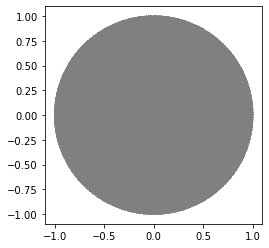

In [4]:
# Check .msh file
meshio_utils.print_diagnostic_gmsh(gmshfile)
# Convert to XDMF file
xdmfiles = meshio_utils.convert_gmsh_to_XDMF(gmshfile,prune_z=True) # prune_z prunes the third coordinate
# Load in Dolfin format (FEniCS)
dmesh = fenics_utils.DolfinMesh.init_from_xdmf(xdmfiles['tetra'*(dim==3)+'triangle'*(dim==2)],
                                               xdmfiles['triangle'*(dim==3)+'line'*(dim==2)])
fe.plot(dmesh.mesh)

# Get the physical tags from .geo file
meshtag = meshio_utils.read_phys_gmsh(xdmfiles['gmsh_physical_entities'])
# Boundaries
bnd_name = "Gamma" # From .geo file, may be a list
Gamma = meshtag[dim-2][bnd_name][0]
# Restriction of the mesh at the boundaries, useful for the space definition
Gamma_restriction = multiphenics_utils.build_MeshRestriction_from_tags(dmesh.mesh,
                                                                       dmesh.boundaries,[Gamma])


## 5: Finite dimensional spaces

In [5]:
# FE for e_u = T
type_T = "CG"
order_T = 1
# FE for f_Q and e_Q
type_Q = "RT"
order_Q = 1
# FE for u and y
type_b = "CG"
order_b = 1

V_T = fe.FunctionSpace(dmesh.mesh, type_T, order_T)
# Care must be taken: for Galerkin FE, VectorFunctionSpace must be used instead of FunctionSpace
if ((type_Q == 'CG') or (type_Q == 'DG')):
    V_Q = fe.VectorFunctionSpace(dmesh.mesh, type_Q, order_Q)
else:
    V_Q = fe.FunctionSpace(dmesh.mesh, type_Q, order_Q)
V_u = fe.FunctionSpace(dmesh.mesh, type_b, order_b)
V_y = fe.FunctionSpace(dmesh.mesh, type_b, order_b)

# Block function space (Mixed Finite Elements)
W = mpfe.BlockFunctionSpace([V_T, V_Q, V_u, V_y], 
                            restrict=[None, None, Gamma_restriction, Gamma_restriction])

# Test/Trial functions
fun_test = mpfe.block_split(mpfe.BlockTestFunction(W))
fun_trial = mpfe.block_split(mpfe.BlockTrialFunction(W))
                                

## 6: Dirac structure and Jacobian

In [6]:
# Young modulus and its inverse (for the sake of simplicity)
Lambda_xx = "2."
Lambda_yy = "1."
Lambda_xy = "0.2 * (1+x[0]) * (1-x[0])"
Lambda = fe.Expression([[Lambda_xx,Lambda_xy],
                        [Lambda_xy,Lambda_yy]], degree=2)
Lambda_inv = fe.Expression([[Lambda_yy,"-"+Lambda_xy],
                            ["-"+Lambda_xy,Lambda_xx]], degree=2)/fe.det(Lambda)

# Mass density times heat capacity
rho_Cv = fe.Expression("2. + 0.25 * (1+x[0]) * (1-x[0])", degree=2)

def Construct_Matrices(fun_trial,fun_test,dx,ds):
    
    # Split trial/test functions
    (e_T, e_Q, u_b, y_b) = fun_trial
    (v_T, v_Q, v_u, v_y) = fun_test
    
    # Mass matrices
    M_T = e_T*rho_Cv*v_T*dx
    M_Q = fe.dot(e_Q,fe.dot(Lambda_inv,v_Q))*dx
    M_u = u_b*v_u*ds
    M_y = y_b*v_y*ds
    
    # Matrices constituting J
    D = fe.dot(e_Q, fe.grad(v_T))*dx
    Dt = fe.dot(fe.grad(e_T), v_Q)*dx
    B = u_b*v_T*ds
    Bt = e_T*v_y*ds
    
    return M_T, M_Q, M_u, M_y, D, Dt, B, Bt

M_T, M_Q, M_u, M_y, D, Dt, B, Bt = Construct_Matrices(fun_trial,fun_test,dmesh.dx,dmesh.ds)

def Dirac(M_T, M_Q, M_u, M_y, D, Dt, B, Bt):
    
    # It is not necessary to add null variational formulations, multiphenics handles this
    # Matrices M and J are rewritten with E and A as : E dz/dt = A z
    E = [
            # - M_T d(T)/dt
            [ -M_T ]
        ]
    
    A = [
            # D J_Q - B u_b
            [ D, -B ],
            # - M_Q J_Q  - D^T T
            [ -M_Q, -Dt ],
            # M_y y = B^T T
            [ -M_y, Bt ],
        
            # The following will allow to treat time-varying control "outside" the Dirac method
            # using another method defining only u_b thanks to v_b: see Define_Control method
            [ -M_u ]
        ]
    
    return (E, A)

# Jacobian consists of E and A when considering the general DAE form: F(t,z,dz/dt) = 0
Jacobian = lambda : Dirac(M_T, M_Q, M_u, M_y, D, Dt, B, Bt)


## 7: Boundary source term

In [7]:
# UFL Format
t_control_begin = 0.5
t_control_end = 2.5
control = "10. * x[1] * sin(t-"+str(t_control_begin)+") * (t >"+str(t_control_begin) \
            +") * sin("+str(t_control_end)+"-t) * (t < "+str(t_control_end)+")"
u = fe.Expression(control, element=V_u.ufl_element(), domain=dmesh.mesh, t=0.)

def Define_Control(t,u,fun_test,ds):
    
    u.t = t # u at time t
    
    (v_T, v_Q, v_u, v_y) = fun_test # Split test functions
    
    return [ [ u*v_u*ds ] ] # with the last line of the Dirac method, this defines u_b with u

# Residual consists of the time-varying forcing when considering the general DAE form: F(t,z,dz/dt) = 0
Residual = lambda t : Define_Control(t,u,fun_test,dmesh.ds)


# 8: Initial data

In [8]:
x0Array = np.zeros(W.dim(),) # Initialisation T0 and J_Q0

T0 = fe.Expression("20.*exp(-30.*(x[0]*x[0]+x[1]*x[1]))", element=V_T.ufl_element(), domain=dmesh.mesh)
T0Fun = fe.interpolate(T0, V_T)
x0Array[0:V_T.dim()] = np.array(T0Fun.vector())

J_Q0 = fe.Expression(["0.","0."], element=V_Q.ufl_element(), domain=dmesh.mesh)
J_Q0Fun = fe.interpolate(J_Q0, V_Q) # Warning: compatible condition "initial data -- boundary control" must be fulfilled
x0Array[V_T.dim():V_T.dim()+V_Q.dim()] = np.array(J_Q0Fun.vector())

x0 = PETSc.Vec().createWithArray(x0Array)


# 9: Time resolution

In [9]:
# PETSc TS solver options (time integration)
# OptDB collects options for PETSc TS: https://petsc.org/release/docs/manualpages/TS/index.html
# a statement as -option can be passed to PETSc TS by setting OptDB["option"]
OptDB = PETSc_utils.get_cleared_options_db()
PETSc.Sys.pushErrorHandler("python") # To see correctly the errors: interferences between FEniCS and PETSc???

OptDB["ts_type"] = "cn" # Crank-Nicolson
OptDB["ksp_type"] = "preonly" # Direct linear solver
OptDB["pc_type"] = "lu" # LU preconditioner

dt = 0.01
tf = 5.
Integration_params = {'dt_export':5.*dt,'cinit':True}

# J_Q, u_b and y_b are algebraic
idx_Lagrange_multipliers = np.concatenate((W.block_dofmap().block_owned_dofs__global_numbering(1),
                                           W.block_dofmap().block_owned_dofs__global_numbering(2),
                                           W.block_dofmap().block_owned_dofs__global_numbering(3)))

name = "2D Heat equation -- Neumann boundary control"
dae = multiphenics_utils.PDAE_linear(Residual,Jacobian,
                                     W.dim(),name,idx_alg=idx_Lagrange_multipliers)

PETSc_utils.TS_integration_dae(dae,x0,dt,tf,**Integration_params)

t_sol = dae.history['t']
z_sol = dae.history['z']


Consistent initialization: 1 step(s) max. of Pseudo TS.
i=       0 t=  -1e+10 * (0s)
i=       1 t=  -1e+10   (0s)
Done (t=  -1e+10).
Elapsed time: 0.7707s
i=       0 t=       0 * (0s)
i=       1 t=    0.01   (0s)
i=       2 t=    0.02   (1s)
i=       3 t=    0.03   (1s)
i=       4 t=    0.04   (2s)
i=       5 t=    0.05 * (2s)
i=       6 t=    0.06   (3s)
i=       7 t=    0.07   (4s)
i=       8 t=    0.08   (4s)
i=       9 t=    0.09   (5s)
i=      10 t=     0.1 * (5s)
i=      11 t=    0.11   (6s)
i=      12 t=    0.12   (6s)
i=      13 t=    0.13   (7s)
i=      14 t=    0.14   (7s)
i=      15 t=    0.15 * (8s)
i=      16 t=    0.16   (8s)
i=      17 t=    0.17   (9s)
i=      18 t=    0.18   (10s)
i=      19 t=    0.19   (10s)
i=      20 t=     0.2 * (11s)
i=      21 t=    0.21   (11s)
i=      22 t=    0.22   (12s)
i=      23 t=    0.23   (12s)
i=      24 t=    0.24   (13s)
i=      25 t=    0.25 * (13s)
i=      26 t=    0.26   (14s)
i=      27 t=    0.27   (14s)
i=      28 t=    0.28  

i=     266 t=    2.66   (143s)
i=     267 t=    2.67   (144s)
i=     268 t=    2.68   (144s)
i=     269 t=    2.69   (145s)
i=     270 t=     2.7 * (145s)
i=     271 t=    2.71   (146s)
i=     272 t=    2.72   (146s)
i=     273 t=    2.73   (147s)
i=     274 t=    2.74   (147s)
i=     275 t=    2.75 * (148s)
i=     276 t=    2.76   (148s)
i=     277 t=    2.77   (149s)
i=     278 t=    2.78   (149s)
i=     279 t=    2.79   (150s)
i=     280 t=     2.8 * (150s)
i=     281 t=    2.81   (151s)
i=     282 t=    2.82   (151s)
i=     283 t=    2.83   (152s)
i=     284 t=    2.84   (153s)
i=     285 t=    2.85 * (153s)
i=     286 t=    2.86   (154s)
i=     287 t=    2.87   (154s)
i=     288 t=    2.88   (155s)
i=     289 t=    2.89   (155s)
i=     290 t=     2.9 * (156s)
i=     291 t=    2.91   (156s)
i=     292 t=    2.92   (157s)
i=     293 t=    2.93   (157s)
i=     294 t=    2.94   (158s)
i=     295 t=    2.95 * (158s)
i=     296 t=    2.96   (159s)
i=     297 t=    2.97   (159s)
i=     2

# 10: Post-processing

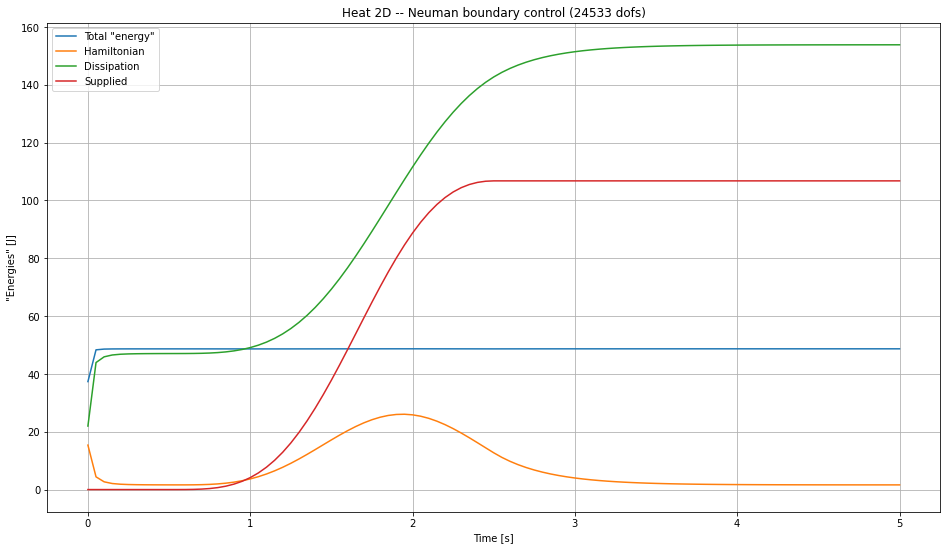

In [10]:
def Plot_Hamiltonian(t,z,u,Lambda_inv,rho_Cv,fun_trial,fun_test,dx,ds):
    
    # Number of time steps
    Nt = np.array(t).size
    
    # For the Hamiltonian
    Ham = np.zeros((Nt,))
    T = mpfe.BlockFunction(W,mpfe.la.BlockPETScVector(z[0]))[0]
    Ham[0] = 0.5*fe.assemble(T*rho_Cv*T*dx)
    
    # For the dissipation
    Diss = np.zeros((Nt,))
    J_Q = mpfe.BlockFunction(W,mpfe.la.BlockPETScVector(z[0]))[1]
    Diss[0] = 0.5 * (t[1] - t[0]) * fe.assemble(fe.dot(J_Q,fe.dot(Lambda_inv, J_Q))*dx)
    J_Q = mpfe.BlockFunction(W,mpfe.la.BlockPETScVector(z[1]))[1]
    Diss[0] = Diss[0] + 0.5 * (t[1] - t[0]) * fe.assemble(fe.dot(J_Q,fe.dot(Lambda_inv, J_Q))*dx)
    
    # For supplied energy
    Supplied = np.zeros((Nt,))
    
    for k in range(1,Nt):
        # Extract solutions
        T = mpfe.BlockFunction(W,mpfe.la.BlockPETScVector(z[k]))[0]
        J_Q_old = mpfe.BlockFunction(W,mpfe.la.BlockPETScVector(z[k-1]))[1]
        J_Q = mpfe.BlockFunction(W,mpfe.la.BlockPETScVector(z[k]))[1]
        y_b_old = mpfe.BlockFunction(W,mpfe.la.BlockPETScVector(z[k-1]))[3]
        y_b = mpfe.BlockFunction(W,mpfe.la.BlockPETScVector(z[k]))[3]
        # Compute energies
        Ham[k] = 0.5*fe.assemble(T*rho_Cv*T*dx)
        u.t = t[k-1]
        Supplied[k] = Supplied[k-1] + 0.5 * (t[k] - t[k-1]) * fe.assemble(y_b_old*u*ds)
        Diss[k] = Diss[k-1] + 0.5 * (t[k] - t[k-1]) * fe.assemble(fe.dot(J_Q_old,fe.dot(Lambda_inv, J_Q_old))*dx)
        u.t = t[k]
        Supplied[k] = Supplied[k] + 0.5 * (t[k] - t[k-1]) * fe.assemble(y_b*u*ds)
        Diss[k] = Diss[k] + 0.5 * (t[k] - t[k-1]) * fe.assemble(fe.dot(J_Q,fe.dot(Lambda_inv, J_Q))*dx)
    
    fig = plt.figure(figsize=(16,9))
    plt.plot(t,Ham+Diss+Supplied,t,Ham,t,Diss,t,-Supplied)
    plt.title("Heat 2D -- Neuman boundary control ("
              +str(W.tabulate_dof_coordinates().shape[0])+" dofs)")
    plt.xlabel("Time [s]")
    plt.ylabel("\"Energies\" [J]")
    plt.grid(axis="both")
    plt.legend(["Total \"energy\"","Hamiltonian","Dissipation","Supplied"])
    plt.show()

Plot_Hamiltonian(t_sol,z_sol,u,Lambda_inv,rho_Cv,fun_trial,fun_test,dmesh.dx,dmesh.ds)


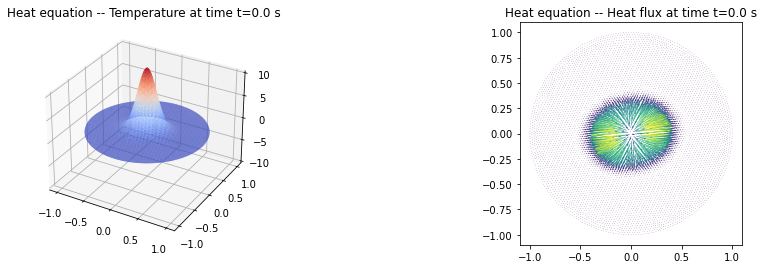

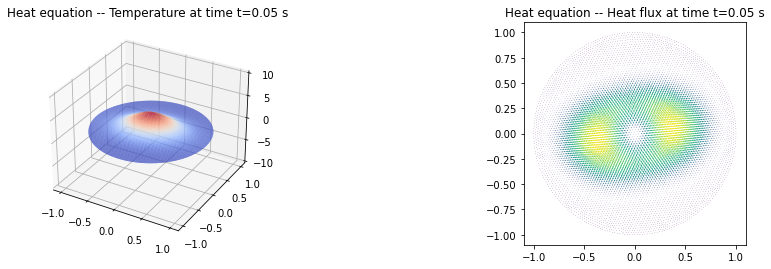

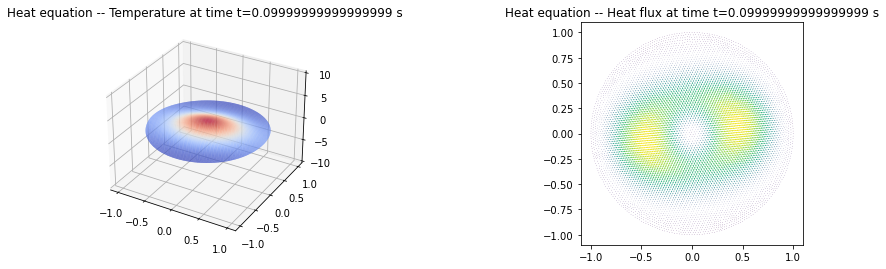

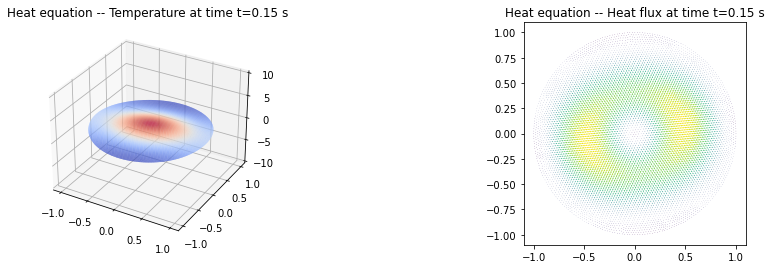

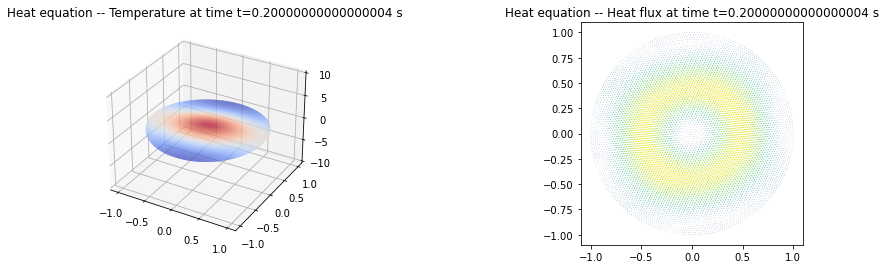

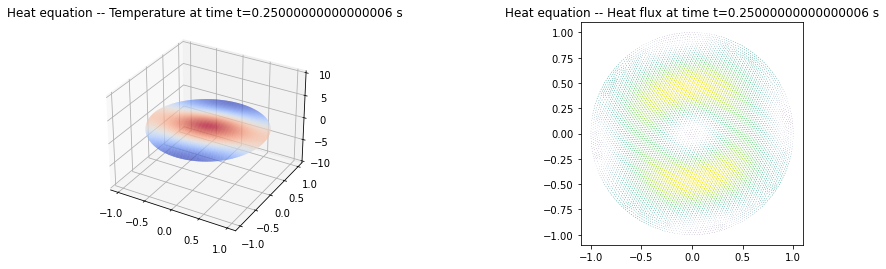

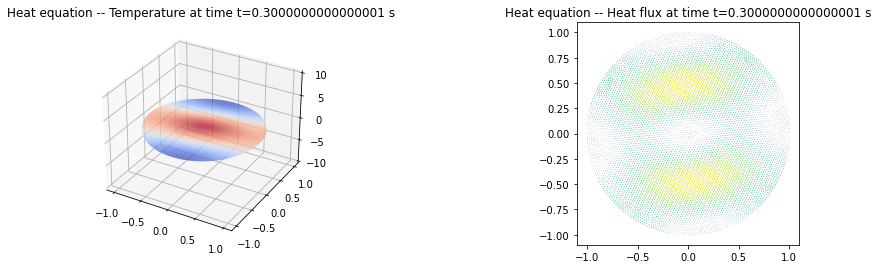

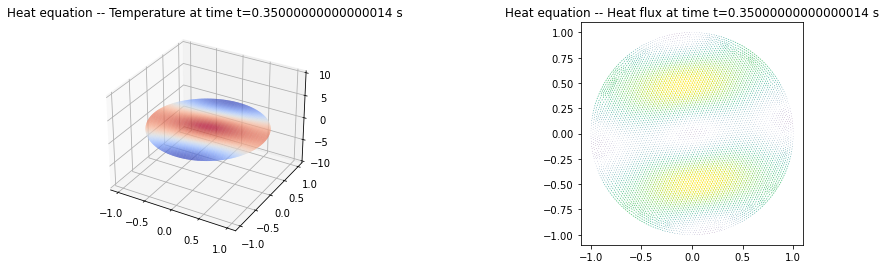

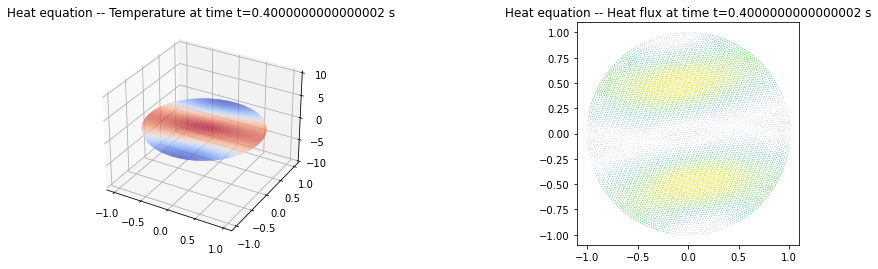

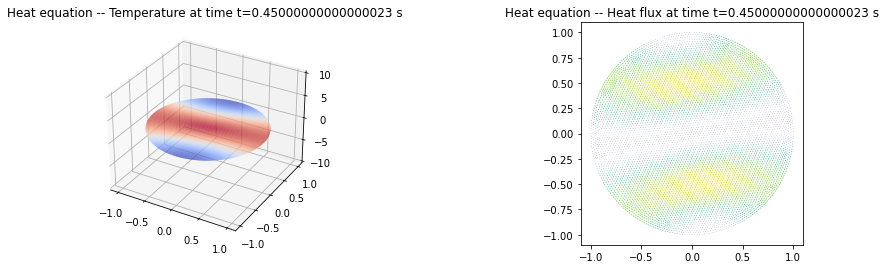

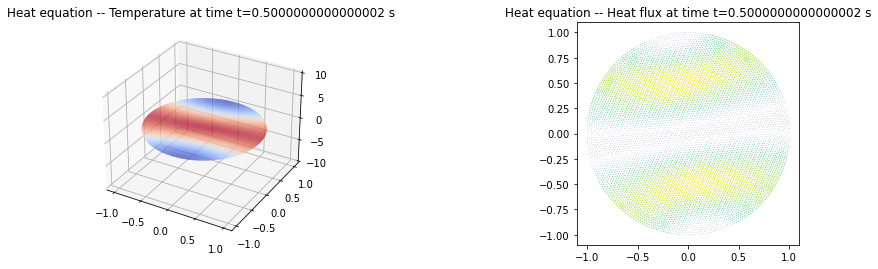

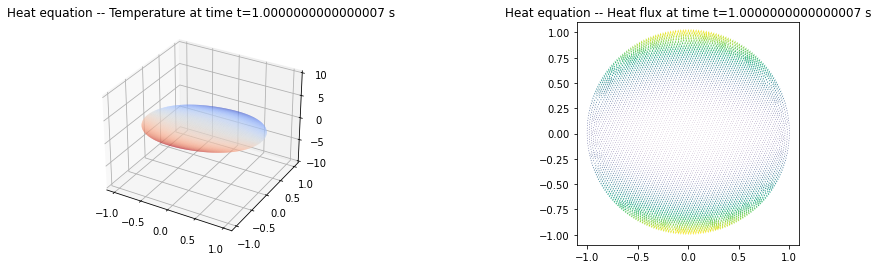

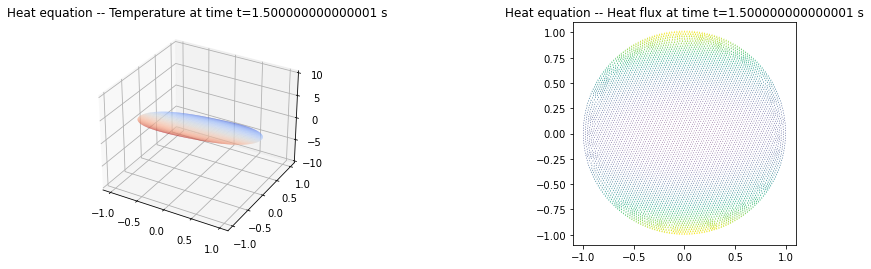

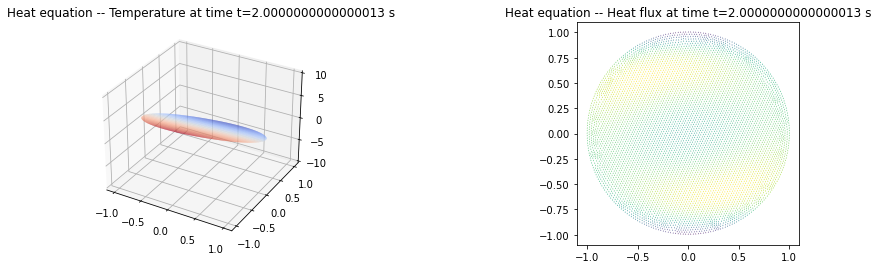

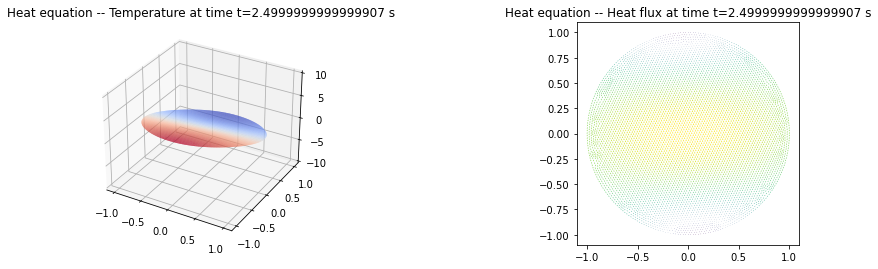

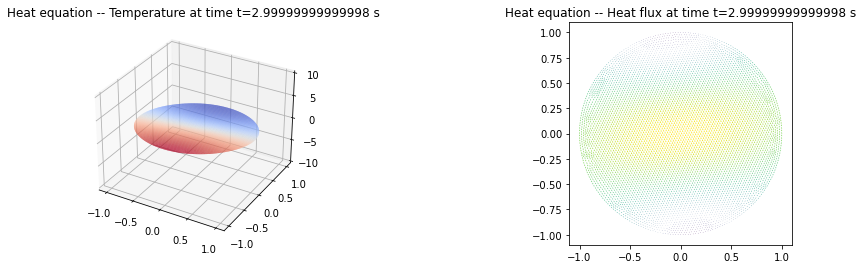

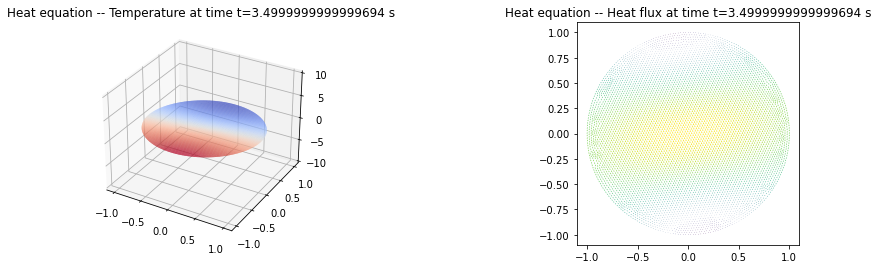

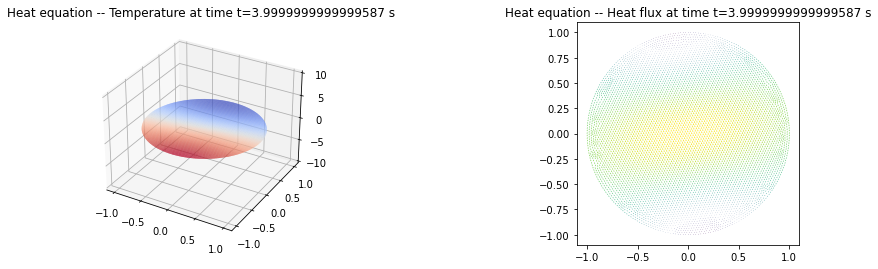

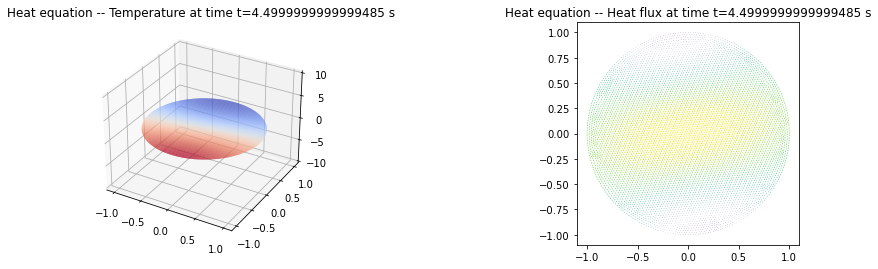

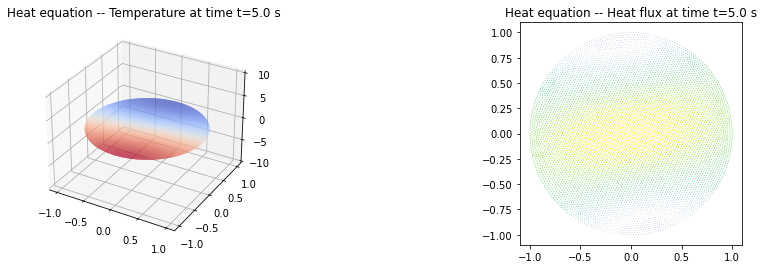

In [15]:
# Plot some instants (in % of final time)
instants = (0.,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.)

# Get coordinates
dofs = V_T.tabulate_dof_coordinates().reshape((-1, dmesh.mesh.geometry().dim()))
x = [dof[0] for dof in dofs]
y = [dof[1] for dof in dofs]

def Plot_Instant(t,z,W,V_T,instant):
    idx = min(int(instant*len(t)),len(t)-1)
    T = mpfe.BlockFunction(W,mpfe.la.BlockPETScVector(z[idx]))[0]
    J_Q = mpfe.BlockFunction(W,mpfe.la.BlockPETScVector(z[idx]))[1]
    
    fig = plt.figure(figsize=(16,9))
    ax1 = fig.add_subplot(2, 2, 1, projection='3d')
    plt.title("Heat equation -- Temperature at time t="+str(t[idx])+" s")
    ax1.plot_trisurf(x,y,T.vector(), cmap=plt.cm.coolwarm)
    ax1.set_zlim(-10, 10)
    ax2 = fig.add_subplot(2, 2, 2)
    plt.title("Heat equation -- Heat flux at time t="+str(t[idx])+" s")
    fe.plot(J_Q)
    plt.show()

for instant in instants:
    Plot_Instant(t_sol,z_sol,W,V_T,instant)


# 11: Exports

In [16]:
# Export for ParaView
pvdfile = 'vtk/'
sol_idx=[0,1]; sol_name = ["T","J_Q"]
print(f"Export for paraview...")
multiphenics_utils.export_pvd(pvdfile,sol_idx,sol_name,t_sol,z_sol,W)
print("Done.")

# Export matrices to MATLAB (binary) format
from scipy.io import savemat
print(f"Export for MATLAB...")
Mdic = {"M_T": fe.assemble(M_T), "M_Q": fe.assemble(M_Q), 
        "M_u": fe.assemble(M_u), "D": fe.assemble(D), 
        "B": fe.assemble(B)}
savemat("heat_matrices.mat", Mdic)
print("Done.")


Export for paraview...
Export to <dolfin.cpp.io.File object at 0x7f7ab7b7faf0>...
Step t=0.0
Step t=0.05
Step t=0.09999999999999999
Step t=0.15
Step t=0.20000000000000004
Step t=0.25000000000000006
Step t=0.3000000000000001
Step t=0.35000000000000014
Step t=0.4000000000000002
Step t=0.45000000000000023
Step t=0.5000000000000002
Step t=0.5500000000000003
Step t=0.6000000000000003
Step t=0.6500000000000004
Step t=0.7000000000000004
Step t=0.7500000000000004
Step t=0.8000000000000005
Step t=0.8500000000000005
Step t=0.9000000000000006
Step t=0.9500000000000006
Step t=1.0000000000000007
Step t=1.0500000000000007
Step t=1.1000000000000008
Step t=1.1500000000000008
Step t=1.2000000000000008
Step t=1.2500000000000009
Step t=1.300000000000001
Step t=1.350000000000001
Step t=1.400000000000001
Step t=1.450000000000001
Step t=1.500000000000001
Step t=1.5500000000000012
Step t=1.6000000000000012
Step t=1.6500000000000012
Step t=1.7000000000000013
Step t=1.7500000000000013
Step t=1.8000000000000014

In [17]:
# Export this .ipynb to a simple .py script
!jupyter nbconvert --to script --no-prompt heat.ipynb


[NbConvertApp] Converting notebook heat.ipynb to script
[NbConvertApp] Writing 21155 bytes to heat.py


In [18]:
# Export this .ipynb to markdown
!jupyter nbconvert --to markdown --no-prompt heat.ipynb


[NbConvertApp] Converting notebook heat.ipynb to markdown
[NbConvertApp] Support files will be in heat_files/
[NbConvertApp] Making directory heat_files
[NbConvertApp] Making directory heat_files
[NbConvertApp] Making directory heat_files
[NbConvertApp] Making directory heat_files
[NbConvertApp] Making directory heat_files
[NbConvertApp] Writing 51952 bytes to heat.md
